In [11]:
import matplotlib.pyplot as plt
import numpy as np

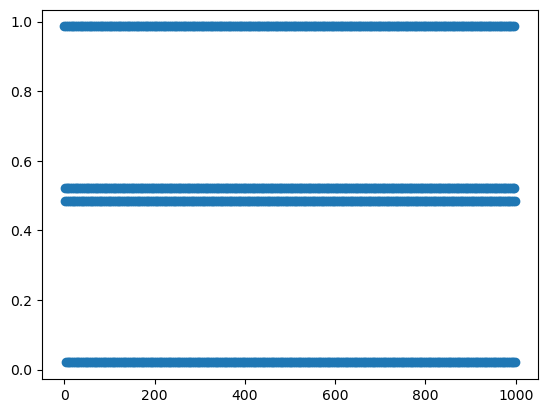

In [23]:
#test congruential generator 

def random_congr(a,c,M):
    L = []
    X = []
    x0 = 42
    for i in range(1000):
        x = (a*x0+c)%M
        L+=[x/M]
        X+=[i]
        x0=x

    return X,L

X,Y = random_congr(1023,13,2048)
plt.scatter(X,Y) #show lattice effect

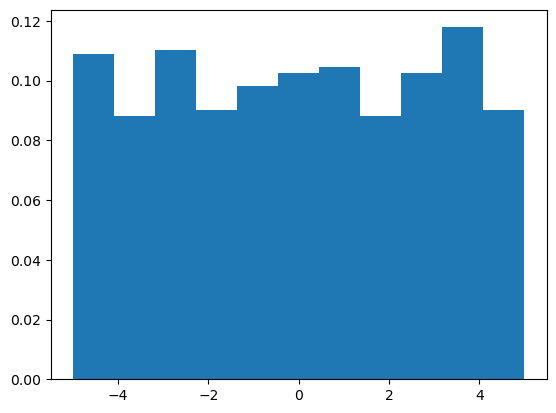

In [24]:
X = np.random.uniform(0, 1, 1000)
Y = 10*X-5

plt.hist(Y, bins='auto', density=True)
plt.show()

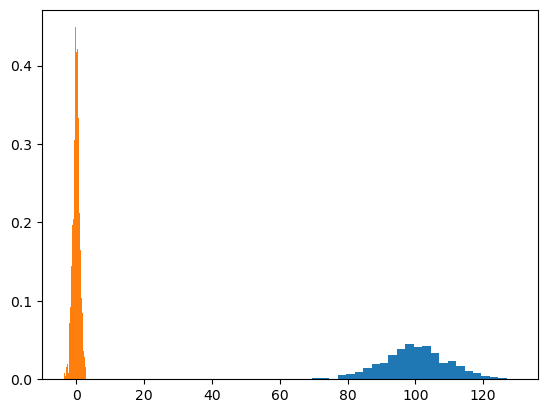

In [27]:
X = np.random.normal(0,1,1000)
Y = 100+10*X

plt.hist(Y,bins='auto',density=True)
plt.hist(X,bins='auto', density=True)
plt.show()

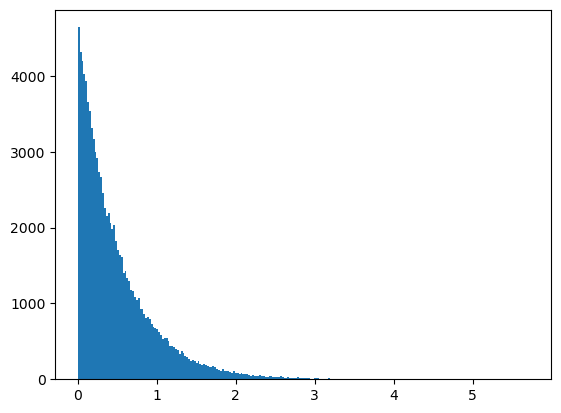

In [36]:
#Simulation of exponential distribution

def sim_expo_distrib(lam,n):
    U = np.random.rand(n)
    Y = -(1/lam)*np.log(U) # U = 1-x avec x suit une loie uniforme sur [0,1]
    return Y

Y = sim_expo_distrib(2,100000)
plt.hist(Y,bins='auto')
plt.show()

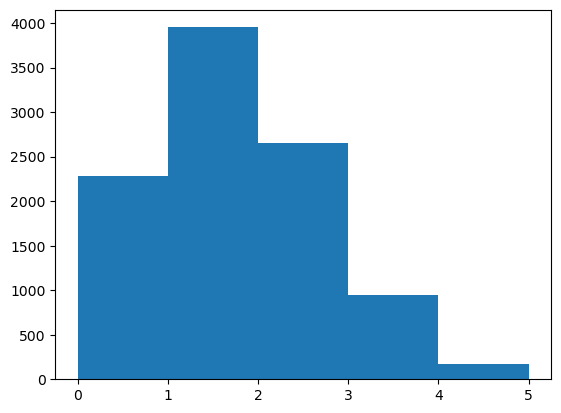

In [39]:
#Exercise : Simulate a Binomial distribution with parameters N=5 and p=0.25

def s_binomial(s, N, p):
    """
    Simulation de s tirages de loi binomiale (N,p)
    """
    # Générer une matrice uniforme s x N
    y = np.random.rand(s, N)
    
    # Compter combien de valeurs < p par ligne
    x = (y < p).sum(axis=1)
    return x

Y = s_binomial(10000,5,0.25)
plt.hist(Y, bins='auto')
plt.show()

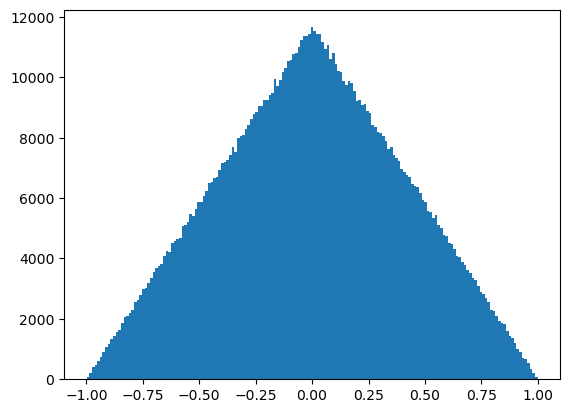

In [45]:
#Acceptance rejection method 

def hat_shaped_density(s,c):
    L = []
    while len(L)< s:
        xi = np.random.uniform(-1,1)
        yi = np.random.uniform(0,c)
        if xi <= 0 :
            if yi <= xi+1 : 
                L.append(xi)
        if xi > 0:
            if yi < 1 - xi :
                L.append(xi)
    return L

Y = hat_shaped_density(1000000,1)
plt.hist(Y, bins='auto')
plt.show()

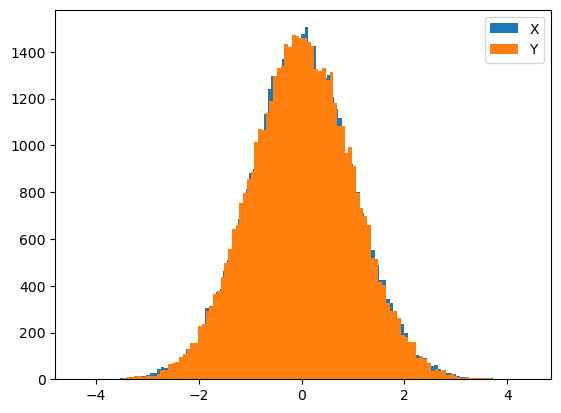

In [55]:
#Algorithme de Box-Muller

U = np.random.uniform(0,1,50000)
V = np.random.uniform(0,1,50000)

X = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
Y = np.sqrt(-2*np.log(U))*np.sin(2*np.pi*V)

plt.hist(X,bins='auto', label="X")
plt.hist(Y,bins="auto", label='Y')
plt.legend()
plt.show()

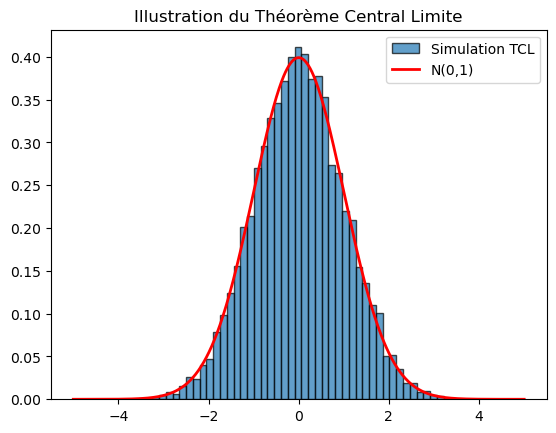

In [57]:
# TCL Simulation


def tcl(n, p, nc):
    """
    Simulation TCL : somme de variables uniformes et comparaison avec N(0,1)
    
    n  : nombre d'échantillons
    p  : nombre de variables uniformes sommées
    nc : nombre de classes de l'histogramme
    """
    # Tirages uniformes sur [0,1]
    X = np.random.rand(n, p)
    
    # Somme des colonnes, centrage et renormalisation
    Z = np.sqrt(12/p) * (X.sum(axis=1) - p/2)
    
    # Histogramme normalisé
    plt.hist(Z, bins=nc, density=True, alpha=0.7, edgecolor="black", label="Simulation TCL")
    
    # Courbe de la densité N(0,1)
    C = np.linspace(-5, 5, 1000)
    plt.plot(C, np.exp(-C**2 / 2) / np.sqrt(2*np.pi), 'r-', lw=2, label="N(0,1)")
    
    plt.title("Illustration du Théorème Central Limite")
    plt.legend()
    plt.show()


tcl(10000, 30, 50)
